# Toy Systems
This notebook is where I will be working on creating toy exoplanet systems in the stellar neighbourhood. Parameters I think are worth investigating are:

+ kinematics (vx, vy, vz)
+ binarity/multiplicity (0, 1)
+ age
+ metalicity (0, 1)
+ giant companions (0, 1)
+ galactic position (x, y, z)
+ colour, magnitude (total)

Could I use synthpop for the stellar stuff. I think to start with I will create a population of singulars and tag them as binaries. 

For the planets, I should populate using distributions from transit NEA. 
+ c (gap complexity)
+ n (multiplicity) <- figure this distribution out
+ r (planet radius) <- draw from the correct gap complexity binned distribution

I only need this for the data if one or more planets has $R>3R_\oplus$.

> "...around 40% of disk stars are estimated to be in binary systems, with some studies suggesting a slightly higher fraction, around 50%."

If 40% of stars are binaries, what percentage of systems are, assuming the rest are singular?

Let's say I have 10 stars:
+ 6 are singular (60%)
+ 4 are binaries (40%).

So those four binaries are in two systems. I have 8 systems:
+ 6 are singular (75%)
+ 2 are binary (25%)

If 50% of stars are binaries, what percentage of systems are, assuming the rest are singular?

Let's say I have 20 stars:
+ 10 are singular (50%)
+ 10 are binaries (50%).

So those ten binaries are in five systems. I have 15 systems:
+ 10 are singular (67%)
+ 5 are binary (33%)

> My binary system percentage should be between 25% and 33%

| Group | $C_{min}$ | $C_{max}$ | $n$      | $f$      |
|-------|-----------|-----------|----------|----------|
|   A   |    0.0    |    0.1    |    388   |   0.49   |
|   B   |    0.1    |    0.2    |    94    |   0.12   |
|   D   |    0.2    |    0.3    |    80    |   0.10   |
|   E   |    0.3    |    0.4    |    68    |   0.09   |
|   F   |    0.4    |    1.0    |    153   |   0.20   |

I'm skipping C in the group names so that I don't mix it up with gap complexity, $C$.

In [17]:
import numpy as np

# i'm not sure I'm nailing the logic here
f_total = np.array([0.49, 0.12, 0.10, 0.09, 0.20])

# I am going to make the gap complexity distribution uniform for binaries
binary_frac_per_10th = 0.03
f_binary = np.ones_like(f_total) * binary_frac_per_10th
f_binary[-1] = binary_frac_per_10th * 6  # because the last bin is 6 times the size of the others
P_binary = np.sum(f_binary) 
print("Binary systems make up {:.2f}% of my sample".format(P_binary*100))

f_singular = f_total - f_binary

f=np.vstack([f_total, f_singular, f_binary])
print(f.T)

Binary systems make up 30.00% of my sample
[[0.49 0.46 0.03]
 [0.12 0.09 0.03]
 [0.1  0.07 0.03]
 [0.09 0.06 0.03]
 [0.2  0.02 0.18]]


In [18]:
388/783

0.4955300127713921

| Group | $C_{min}$ | $C_{max}$ | $n$      | $f_{total}$ | $f_{singular}$ | $f_{binary}$ |
|-------|-----------|-----------|----------|-------------|----------------|--------------|
|   A   |    0.0    |    0.1    |    388   |     0.49    |      0.46      |     0.03     |
|   B   |    0.1    |    0.2    |    94    |     0.12    |      0.09      |     0.03     |
|   D   |    0.2    |    0.3    |    80    |     0.10    |      0.07      |     0.03     |
|   E   |    0.3    |    0.4    |    68    |     0.09    |      0.06      |     0.03     |
|   F   |    0.4    |    1.0    |    153   |     0.20    |      0.02      |     0.18     |

I'm going to make the assumption that 30% of disk stars are in binary systems. So, for every ten draws from the host population sample, three are in a binary systems.

From 10 draws I have:
+ 7 single stars 
+ 3 binary systems
+ 6 binary star.

Therefore, 46% of stars are in binaries.

<img src="Rice2026F4.jpeg" alt="Rice2026F4" style="width: 50%; height: auto;">

I'm reading the data off with [plot digitizer](https://plotdigitizer.com/app).

In [55]:
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

# Generate x values for the fitted curve
R = np.linspace(0, 6, 1000)

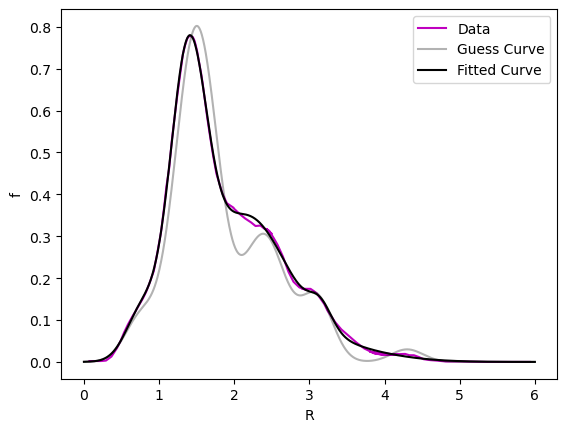

In [56]:
# Load the data from the CSV file
df = pd.read_csv("Rice26F4-04.csv", header=0, skipinitialspace=True)

# Define the function for the sum of 5 Gaussians
def gaussian_sum(x, *params):
    a1, b1, c1, a2, b2, c2, a3, b3, c3, a4, b4, c4, a5, b5, c5 = params
    return (a1 * np.exp(-((x - b1) / c1) ** 2) +
            a2 * np.exp(-((x - b2) / c2) ** 2) +
            a3 * np.exp(-((x - b3) / c3) ** 2) +
            a4 * np.exp(-((x - b4) / c4) ** 2) +
            a5 * np.exp(-((x - b5) / c5) ** 2))

# Fit the sum of 5 Gaussians to the data
params_guess = [0.1, 0.75, 0.3, 0.8, 1.5, 0.4, 0.3, 2.4, 0.4, 0.15, 3.1, 0.3, 0.03, 4.3, 0.3]  # Initial guess for the parameters

params_opt, _ = curve_fit(gaussian_sum, df['R'], df['f'], p0=params_guess)

# Evaluate the fitted curve at the x values
f0 = gaussian_sum(R, *params_guess)
f_fit = gaussian_sum(R, *params_opt)

# Plot the data and the fitted curve
plt.plot(df['R'], df['f'], color='m', label='Data')
plt.plot(R, f0, 'k', label='Guess Curve', alpha=0.3)
plt.plot(R, f_fit, 'k', label='Fitted Curve')
plt.xlabel('R')
plt.ylabel('f')
plt.legend()

C4 = f_fit.copy()

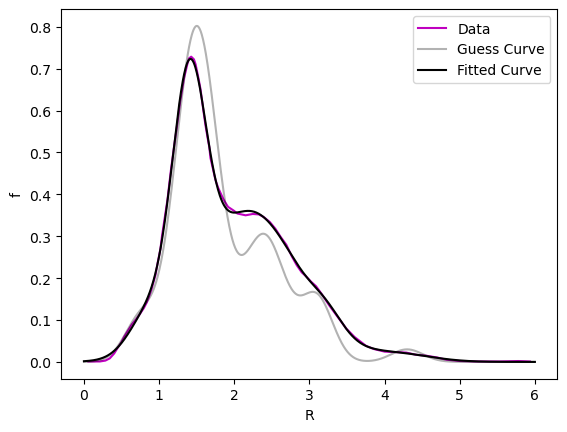

In [57]:
# Load the data from the CSV file
df = pd.read_csv("Rice26F4-03.csv", header=0, skipinitialspace=True)

# Define the function for the sum of 5 Gaussians
def gaussian_sum(x, *params):
    a1, b1, c1, a2, b2, c2, a3, b3, c3, a4, b4, c4, a5, b5, c5 = params
    return (a1 * np.exp(-((x - b1) / c1) ** 2) +
            a2 * np.exp(-((x - b2) / c2) ** 2) +
            a3 * np.exp(-((x - b3) / c3) ** 2) +
            a4 * np.exp(-((x - b4) / c4) ** 2) +
            a5 * np.exp(-((x - b5) / c5) ** 2))

# Fit the sum of 5 Gaussians to the data
params_guess = [0.1, 0.75, 0.3, 0.8, 1.5, 0.4, 0.3, 2.4, 0.4, 0.15, 3.1, 0.3, 0.03, 4.3, 0.3]  # Initial guess for the parameters

params_opt, _ = curve_fit(gaussian_sum, df['R'], df['f'], p0=params_guess)

# Evaluate the fitted curve at the x values
f0 = gaussian_sum(R, *params_guess)
f_fit = gaussian_sum(R, *params_opt)

# Plot the data and the fitted curve
plt.plot(df['R'], df['f'], color='m', label='Data')
plt.plot(R, f0, 'k', label='Guess Curve', alpha=0.3)
plt.plot(R, f_fit, 'k', label='Fitted Curve')
plt.xlabel('R')
plt.ylabel('f')
plt.legend()

C3 = f_fit.copy()

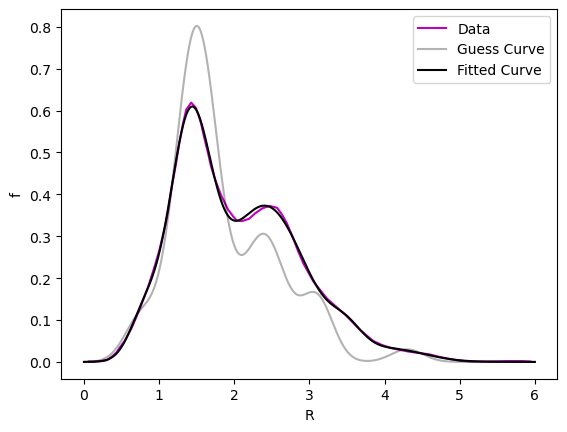

In [58]:
# Load the data from the CSV file
df = pd.read_csv("Rice26F4-02.csv", header=0, skipinitialspace=True)

# Define the function for the sum of 5 Gaussians
def gaussian_sum(x, *params):
    a1, b1, c1, a2, b2, c2, a3, b3, c3, a4, b4, c4, a5, b5, c5 = params
    return (a1 * np.exp(-((x - b1) / c1) ** 2) +
            a2 * np.exp(-((x - b2) / c2) ** 2) +
            a3 * np.exp(-((x - b3) / c3) ** 2) +
            a4 * np.exp(-((x - b4) / c4) ** 2) +
            a5 * np.exp(-((x - b5) / c5) ** 2))

# Fit the sum of 5 Gaussians to the data
params_guess = [0.1, 0.75, 0.3, 0.8, 1.5, 0.4, 0.3, 2.4, 0.4, 0.15, 3.1, 0.3, 0.03, 4.3, 0.3]  # Initial guess for the parameters

params_opt, _ = curve_fit(gaussian_sum, df['R'], df['f'], p0=params_guess)

# Evaluate the fitted curve at the x values
f0 = gaussian_sum(R, *params_guess)
f_fit = gaussian_sum(R, *params_opt)

# Plot the data and the fitted curve
plt.plot(df['R'], df['f'], color='m', label='Data')
plt.plot(R, f0, 'k', label='Guess Curve', alpha=0.3)
plt.plot(R, f_fit, 'k', label='Fitted Curve')
plt.xlabel('R')
plt.ylabel('f')
plt.legend()

C2 = f_fit.copy()

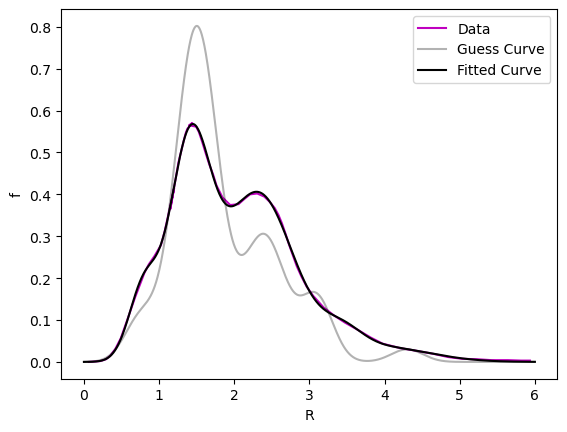

In [59]:
# Load the data from the CSV file
df = pd.read_csv("Rice26F4-01.csv", header=0, skipinitialspace=True)

# Define the function for the sum of 5 Gaussians
def gaussian_sum(x, *params):
    a1, b1, c1, a2, b2, c2, a3, b3, c3, a4, b4, c4, a5, b5, c5 = params
    return (a1 * np.exp(-((x - b1) / c1) ** 2) +
            a2 * np.exp(-((x - b2) / c2) ** 2) +
            a3 * np.exp(-((x - b3) / c3) ** 2) +
            a4 * np.exp(-((x - b4) / c4) ** 2) +
            a5 * np.exp(-((x - b5) / c5) ** 2))

# Fit the sum of 5 Gaussians to the data
params_guess = [0.1, 0.75, 0.3, 0.8, 1.5, 0.4, 0.3, 2.4, 0.4, 0.15, 3.1, 0.3, 0.03, 4.3, 0.3]  # Initial guess for the parameters

params_opt, _ = curve_fit(gaussian_sum, df['R'], df['f'], p0=params_guess)

# Evaluate the fitted curve at the x values
f0 = gaussian_sum(R, *params_guess)
f_fit = gaussian_sum(R, *params_opt)

# Plot the data and the fitted curve
plt.plot(df['R'], df['f'], color='m', label='Data')
plt.plot(R, f0, 'k', label='Guess Curve', alpha=0.3)
plt.plot(R, f_fit, 'k', label='Fitted Curve')
plt.xlabel('R')
plt.ylabel('f')
plt.legend()

C1 = f_fit.copy()

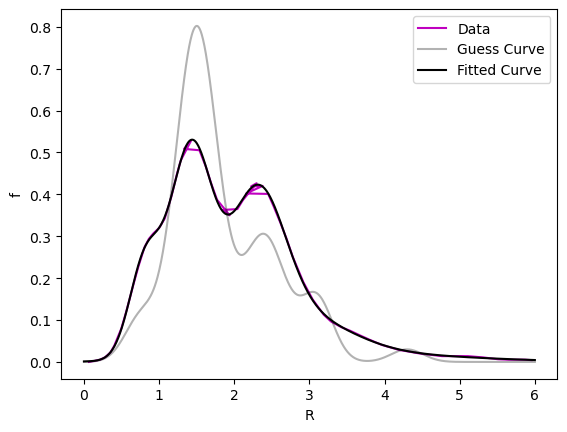

In [60]:
# Load the data from the CSV file
df = pd.read_csv("Rice26F4-00.csv", header=0, skipinitialspace=True)

# Define the function for the sum of 5 Gaussians
def gaussian_sum(x, *params):
    a1, b1, c1, a2, b2, c2, a3, b3, c3, a4, b4, c4, a5, b5, c5 = params
    return (a1 * np.exp(-((x - b1) / c1) ** 2) +
            a2 * np.exp(-((x - b2) / c2) ** 2) +
            a3 * np.exp(-((x - b3) / c3) ** 2) +
            a4 * np.exp(-((x - b4) / c4) ** 2) +
            a5 * np.exp(-((x - b5) / c5) ** 2))

# Fit the sum of 5 Gaussians to the data
params_guess = [0.1, 0.75, 0.3, 0.8, 1.5, 0.4, 0.3, 2.4, 0.4, 0.15, 3.1, 0.3, 0.03, 4.3, 0.3]  # Initial guess for the parameters

params_opt, _ = curve_fit(gaussian_sum, df['R'], df['f'], p0=params_guess)

# Evaluate the fitted curve at the x values
f0 = gaussian_sum(R, *params_guess)
f_fit = gaussian_sum(R, *params_opt)

# Plot the data and the fitted curve
plt.plot(df['R'], df['f'], color='m', label='Data')
plt.plot(R, f0, 'k', label='Guess Curve', alpha=0.3)
plt.plot(R, f_fit, 'k', label='Fitted Curve')
plt.xlabel('R')
plt.ylabel('f')
plt.legend()

C0 = f_fit.copy()

the data is out of order on that one

0.0022808376097268857
1.3665504804866737e-05
0.9999999999999999


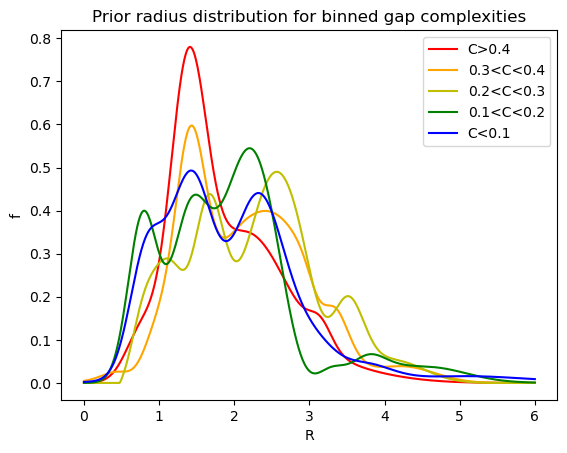

In [61]:
# Break the distribution into bins
F = (153 * C4) / 153
E = (221*C3 - 153*C4) / 68
D = (301*C2 - 221*C3) / 80
B = (395*C1 - 301*C2) / 94
A = (783*C0 - 395*C1) / 388

#normalization = np.sum([np.sum(A), np.sum(B), np.sum(D), np.sum(E), np.sum(F)])/5.0  
#normalisation = 100.0/6.0

# I have some stupid negatives I need to get rid of
pior_arrays = [A,B,D,E,F]
for i in range(F.shape[0]):
    for array in pior_arrays:
        if array[i] < 0:
            array[i] = 0

plt.plot(R, F, 'r', label='C>0.4')
plt.plot(R, E, 'orange', label='0.3<C<0.4')
plt.plot(R, D, 'y', label='0.2<C<0.3')
plt.plot(R, B, 'g', label='0.1<C<0.2')
plt.plot(R, A, 'b', label='C<0.1')
plt.xlabel('R')
plt.ylabel('f')
plt.title('Prior radius distribution for binned gap complexities')
plt.legend()

print(A[0])
# normalise the arrays
for array in pior_arrays:
    array /= np.sum(array)

print(A[0])  # checking A has been altered
print(np.sum(B))  # checking normalisation

Now lets make a function for drawing from these priors.

In [62]:

radius_prior_stats = {}
# I have arbritrarily assigned a uniform 0.04/0.1
radius_prior_stats['header'] = ('c_min', 'c_max', 'P_total', 'P_singular', 'P_binary', 'distribution')
radius_prior_stats['A'] = (0.0, 0.1, 0.49, 0.46, 0.03, A)
radius_prior_stats['B'] = (0.1, 0.2, 0.12, 0.09, 0.03, B)
radius_prior_stats['D'] = (0.2, 0.3, 0.10, 0.07, 0.03, D)
radius_prior_stats['E'] = (0.3, 0.4, 0.09, 0.06, 0.03, E)
radius_prior_stats['F'] = (0.4, 1.0, 0.20, 0.02, 0.18, F)

print(radius_prior_stats)

{'header': ('c_min', 'c_max', 'P_total', 'P_singular', 'P_binary', 'distribution'), 'A': (0.0, 0.1, 0.49, 0.46, 0.03, array([1.36655048e-05, 1.39378090e-05, 1.42259382e-05, 1.45312675e-05,
       1.48552828e-05, 1.51995882e-05, 1.55659131e-05, 1.59561200e-05,
       1.63722130e-05, 1.68163454e-05, 1.72908288e-05, 1.77981417e-05,
       1.83409386e-05, 1.89220587e-05, 1.95445359e-05, 2.02116082e-05,
       2.09267268e-05, 2.16935663e-05, 2.25160341e-05, 2.33982804e-05,
       2.43447073e-05, 2.53599789e-05, 2.64490305e-05, 2.76170772e-05,
       2.88696235e-05, 3.02124713e-05, 3.16517281e-05, 3.31938146e-05,
       3.48454713e-05, 3.66137655e-05, 3.85060961e-05, 4.05301988e-05,
       4.26941498e-05, 4.50063687e-05, 4.74756197e-05, 5.01110128e-05,
       5.29220026e-05, 5.59183860e-05, 5.91102989e-05, 6.25082107e-05,
       6.61229175e-05, 6.99655333e-05, 7.40474798e-05, 7.83804739e-05,
       8.29765131e-05, 8.78478595e-05, 9.30070208e-05, 9.84667299e-05,
       1.04239922e-04, 1.10339

In [63]:
def radius_prior_draw(C, n):
    '''draw from the radius prior given the gap complexity
    
    Parameters
    ----------
    C : float
        gap complexity
    n : int
        number of samples to draw

    Global Variables
    ----------------
    R : array
        array of length 100 with radii values from 0 to 6
    A, B, D, E, F : arrays
        arrays of length 100 with relative probabilities of radii values for different gap complexity bins
        
    Returns
    -------
    r : array of length n
        radii'''
    
    # do i also need a binary flag and to multiply p by f?
    # no
    # the binarity is acounted for in the C draw

    RNG = np.random.default_rng()
    random_values = RNG.uniform(size=n)
    
    if C > 0.4:
        F_cdf = np.cumsum(F)
        r = np.interp(random_values, F_cdf, R)
    elif C > 0.3:
        E_cdf = np.cumsum(E)
        r = np.interp(random_values, E_cdf, R)
    elif C > 0.2:
        D_cdf = np.cumsum(D)
        r = np.interp(random_values, D_cdf, R)
    elif C > 0.1:
        B_cdf = np.cumsum(B)
        r = np.interp(random_values, B_cdf, R)
    else:
        A_cdf = np.cumsum(A)
        r = np.interp(random_values, A_cdf, R)

    return r

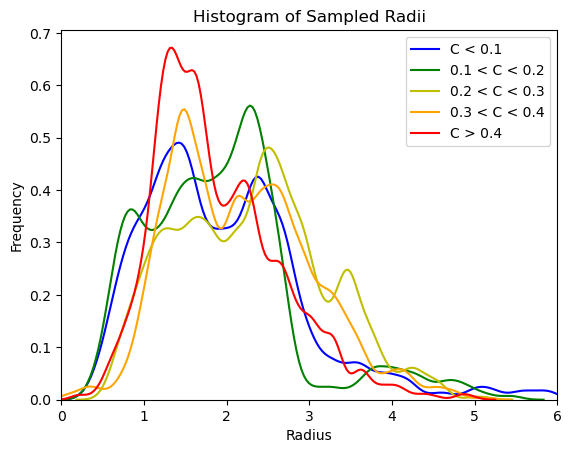

In [97]:
import seaborn as sns

samples_A = radius_prior_draw(0.05, 1000)
samples_B = radius_prior_draw(0.15, 1000)
samples_D = radius_prior_draw(0.25, 1000)
samples_E = radius_prior_draw(0.35, 1000)
samples_F = radius_prior_draw(0.45, 1000)

# Plot KDE for each sample set
bw = 0.5
sns.kdeplot(samples_A, label='C < 0.1', linewidth=1.5, color='b', bw_adjust=bw)
sns.kdeplot(samples_B, label='0.1 < C < 0.2', linewidth=1.5, color='g', bw_adjust=bw)
sns.kdeplot(samples_D, label='0.2 < C < 0.3', linewidth=1.5, color='y', bw_adjust=bw)
sns.kdeplot(samples_E, label='0.3 < C < 0.4', linewidth=1.5, color='orange', bw_adjust=bw)
sns.kdeplot(samples_F, label='C > 0.4', linewidth=1.5, color='r', bw_adjust=bw)
plt.xlabel('Radius')
plt.ylabel('Frequency')
plt.title('Histogram of Sampled Radii')
plt.xlim(0, 6)
plt.legend()
plt.show()

It smooths thing out for a small number of draws, but I feel like this is wokring.

## Number of planets in a system

Next I need to figure out what the distribution is for number of planets in a system. I can't find a good answer for this online, so I will have to use NEA. I'll make a cut at 1000 day periods, like Rice. 

See the [Exoplanet Table](Exoplanet_table.ipynb) notebook.

<img src="planet_number_density.png" alt="Rice2026F4" style="width: 60%; height: auto;">

In [29]:
A_snum1, decay_snum1 = 1.1, 0.7
A_snum2, decay_snum2 = 0.7, 0.5
N = np.arange(10)+1  # integer array from 1 to 10
# Probability of a number of planes in the system given that the host is singular
P_pnum_snum1 = A_snum1 * np.exp(-decay_snum1 * N)
P_pnum_snum2 = A_snum2 * np.exp(-decay_snum2 * N)
P_pnum_snum1 /= np.sum(P_pnum_snum1) # normalize
P_pnum_snum2 /= np.sum(P_pnum_snum2) # normalize
print(N)
print(P_pnum_snum1, np.sum(P_pnum_snum1), np.sum(P_pnum_snum1 * N))
print(P_pnum_snum2, np.sum(P_pnum_snum2), np.sum(P_pnum_snum2 * N))
print(np.sum(P_pnum_snum2 * N)/np.sum(P_pnum_snum1 * N))

[ 1  2  3  4  5  6  7  8  9 10]
[0.50387417 0.25021651 0.12425384 0.06170263 0.03064062 0.01521568
 0.00755588 0.00375214 0.00186326 0.00092527] 0.9999999999999999 1.9773067211022457
[0.3961385  0.24027015 0.14573121 0.08839045 0.05361152 0.03251703
 0.01972257 0.01196235 0.00725553 0.0044007 ] 1.0 2.473657533473756
1.2510236813916358


The binary star priors are making planets more efficiently than the singulars:

$$ \Gamma = 1.25. $$

I think I need to draw fewer binaries to make up for it. Or I could give them bith the same distribution and ignore the problem.

I'm doing that. They can both have the binary density because it looks more reasonable to me.

In [30]:
P_pnum = P_pnum_snum2.copy()

radius_prior_stats['A'] = (0.0, 0.1, 0.49, 0.46, 0.03, A)
radius_prior_stats['B'] = (0.1, 0.2, 0.12, 0.09, 0.03, B)
radius_prior_stats['D'] = (0.2, 0.3, 0.10, 0.07, 0.03, D)
radius_prior_stats['E'] = (0.3, 0.4, 0.09, 0.06, 0.03, E)
radius_prior_stats['F'] = (0.4, 1.0, 0.20, 0.02, 0.18, F)



In [119]:
def C_prior_draw(n):
    '''draw the gap complexity for a given binary flag
    
    Parameters
    ----------
    n   : int
        number of systems to draw planets for

    Returns
    -------
    C : float
        gap complexity
        
    binary_flag : bool
        binary flag'''
    
    binary_prob = np.array([0.03, 0.03, 0.03, 0.03, 0.18])
    singular_prob = np.array([0.46, 0.09, 0.07, 0.06, 0.02])
    all_prob = np.hstack([np.sum(singular_prob), np.sum(binary_prob)])
    bin_values = [0.05, 0.15, 0.25, 0.35, 0.8]# center of bins for which I have relative probabilities

    # Normalize the probabilities
    binary_prob /= binary_prob.sum()
    singular_prob /= singular_prob.sum()

    # Cumulative distribution function
    binary_cdf = np.cumsum(binary_prob)
    singular_cdf = np.cumsum(singular_prob)

    # generate C and binarity
    RNG = np.random.default_rng()
    random_values = RNG.uniform(size=n)
    C_binary = np.interp(random_values, binary_cdf, bin_values)
    C_singular = np.interp(random_values, singular_cdf, bin_values)
    binary_flag = RNG.choice([0,1], size=n, p=all_prob)
    print(all_prob)

    # binary_flag is an array of 0s and 1s where 1 means binary star system
    print('binary:', binary_flag)

    # empty C array
    C = np.zeros_like(binary_flag, dtype=float)
    
    # fill C with the correct values
    print('B:', C_binary)
    print('S:', C_singular)
    print(binary_flag)
    C[binary_flag == 1] = C_binary[binary_flag == 1]
    C[binary_flag == 0] = C_singular[binary_flag == 0]
    
    return C, binary_flag

def multiplicity_draw(sy_num):
    '''draw the planet multiplicity number for a given number of systems.
    
    Parameters
    ----------
    sy_num : int
        number of systems to draw planets for
    
    Returns
    -------
    p_num : array of length sy_num
        number of planets in each system
    '''
    N = np.arange(10)+1  # integer array from 1 to 10

    # Probability of a number of planets in the system
    A_snum, decay_snum = 0.7, 0.5
    P_pnum_snum = A_snum * np.exp(-decay_snum * N)
    P_pnum_snum /= np.sum(P_pnum_snum)  # normalize

    # draw array
    rng = np.random.default_rng()
    pl_num = rng.choice(N, size=sy_num, replace=True, p=P_pnum_snum)

    return pl_num

def planet_prior_draw(sy_num):
    '''draw the number of planets in a system for a given number of stars.

    Parameters
    ----------
    sy_num : int
        number of systems to draw planets for

    Returns
    -------
    rn : list
        of length sy_num with elements that arays arrays of length pl_num containing radii values
    Cn : array
        of length sy_num containing gap complexities
    binary_flag : array 
        of length sy_num containing 0 or 1 where 1 indicates a binary
    '''
    Cn, binary_flag = C_prior_draw(sy_num) # gap complexity
    pl_num = multiplicity_draw(sy_num)
    rn = []
    for i, C in enumerate(Cn):
        r = radius_prior_draw(C, pl_num[i])  # array of length n with radii values
        rn.append(r)

    return rn, Cn, binary_flag, pl_num

In [120]:
r, c, b, m = planet_prior_draw(10000)
print(r, c, b, m)

[0.7 0.3]
binary: [0 0 0 ... 1 1 0]
B: [0.14603315 0.609068   0.34382759 ... 0.44045351 0.68819316 0.05      ]
S: [0.05       0.11866311 0.05       ... 0.05       0.21520993 0.05      ]
[0 0 0 ... 1 1 0]
[array([2.85097585, 1.44895008, 0.56438982, 1.68161878, 1.00913147]), array([2.38084603, 0.82889173]), array([1.93157042]), array([1.22802   , 3.1189322 , 0.90835976, 2.3013964 ]), array([0.74651617]), array([2.53121854, 2.03216768, 0.91375896, 0.98825378]), array([1.38464102]), array([2.25920767, 3.5591783 ]), array([0.84480809, 2.11509169, 2.10091409, 1.81868796, 1.84022584]), array([1.37138492, 1.51747848]), array([3.88520007, 1.59841711, 1.81929501, 2.10825175, 1.23871498,
       2.8737769 , 1.67757254, 1.97158284, 1.30921109]), array([0.73360887, 1.14981644]), array([2.80395263]), array([2.28796125]), array([1.45316882]), array([1.91987575, 1.38456122, 2.49791064, 1.27890326]), array([3.0383709]), array([0.72056196]), array([2.90710785, 1.97689744]), array([1.84174887, 2.10084846,

In [3]:
import seaborn
import matplotlib
import sys

print("matplotlib: {}".format(matplotlib.__version__))
print("seaborn: {}".format(seaborn.__version__))
print("Python version:", sys.version)
print("Python version info:", sys.version_info)

matplotlib: 3.7.2
seaborn: 0.13.2
Python version: 3.8.19 (default, Mar 20 2024, 15:27:52) 
[Clang 14.0.6 ]
Python version info: sys.version_info(major=3, minor=8, micro=19, releaselevel='final', serial=0)
